#Shazmeen Shaikh   #Date: 16th Feb 2020
#Data Visualization Assignment 2

I have taken 3 images similar to each other. All have characters in them. Although the colour of the characters are different. It is a clear image with a background included.
we have installed required library as mentioned in the class and loaded the palette as well.
We loaded and opened the image in jupyter notebook and then downsized each one to an 8 colour scale. We found the most common 8 colours in the image and made a histogram for the same by reshaping it and putting them in a list. We also created RGBA masks for each of the images. we named the colours and stored their values as well. We finally plot the histogram for each image side by side to the downscaled image.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import PIL.Image as Image

# we won't use these packages directly, but the function that picks colors will
import scipy
import scipy.misc
import scipy.cluster

# If you haven't yet, you may need to install scipy
#!conda install -c anaconda scipy

def quantizetopalette(silf, palette, dither=False):
    """Convert an RGB or L mode image to use a given P image's palette."""
    # refs:
    # [1] https://stackoverflow.com/questions/29433243/convert-image-to-specific-palette-using-pil-without-dithering

    silf.load()

    # use palette from reference image
    palette.load()
    if palette.mode != "P":
        raise ValueError("bad mode for palette image")
    if silf.mode != "RGB" and silf.mode != "L":
        raise ValueError(
            "only RGB or L mode images can be quantized to a palette"
            )
    im = silf.im.convert("P", 1 if dither else 0, palette.im)
    # the 0 above means turn OFF dithering

    # Later versions of Pillow (4.x) rename _makeself to _new
    try:
        return silf._new(im)
    except AttributeError:
        return silf._makeself(im)


def convert_image(image, ncolors = 8):
    # refs:
    # [1]: https://stackoverflow.com/questions/3241929/python-find-dominant-most-common-color-in-an-image
    image = image.convert('RGB') # can't use alpha channel
    NUM_CLUSTERS = ncolors # unnecessary re-naming
    
    ar = np.array(image) # to data
    
    shape = ar.shape
    ar = ar.reshape(np.product(shape[:2]), shape[2]).astype(float)

    print('finding ' + str(ncolors) + ' most common colors.  Note, if "ncolors" is large, this can take a while...')
    codes, dist = scipy.cluster.vq.kmeans(ar, NUM_CLUSTERS)
    print('Done finding colors! cluster centres in RGB:\n', codes)

    vecs, dist = scipy.cluster.vq.vq(ar, codes)         # assign codes
    counts, bins = np.histogram(vecs, len(codes))    # count occurrences
    
    # into a 256 palette, integer types
    reds = np.round(np.interp(np.linspace(0,255,256), np.linspace(0,NUM_CLUSTERS-1,NUM_CLUSTERS), codes[:,0])).astype('int')
    greens = np.round(np.interp(np.linspace(0,255,256), np.linspace(0,NUM_CLUSTERS-1,NUM_CLUSTERS), codes[:,1])).astype('int')
    blues = np.round(np.interp(np.linspace(0,255,256), np.linspace(0,NUM_CLUSTERS-1,NUM_CLUSTERS), codes[:,2])).astype('int')

    # palette formatting:
    myPalette = []
    for i in range(256):
        myPalette.extend( (reds[i],greens[i],blues[i]))
        
    palimage = Image.new('P', (16, 16)) # placeholder image
    palimage.putpalette(myPalette)
    newimage = quantizetopalette(image, palimage, dither=False)
    newimage = newimage.convert('RGB')
    return newimage, codes

# similar to above, but allows you to import your own RGB sequence
def convert_image_specific(image, colors = [ [255, 255, 255], [255, 0, 0], [0,0,255], [0, 0, 0] ]):
    image = image.convert('RGB') # can't use alpha channel
    NUM_CLUSTERS = len(colors) # unnecessary re-naming
    codes = np.array(colors) # unnecessary renaming
    
    # into a 256 palette, integer types
    reds = np.round(np.interp(np.linspace(0,255,256), np.linspace(0,NUM_CLUSTERS-1,NUM_CLUSTERS), codes[:,0])).astype('int')
    greens = np.round(np.interp(np.linspace(0,255,256), np.linspace(0,NUM_CLUSTERS-1,NUM_CLUSTERS), codes[:,1])).astype('int')
    blues = np.round(np.interp(np.linspace(0,255,256), np.linspace(0,NUM_CLUSTERS-1,NUM_CLUSTERS), codes[:,2])).astype('int')

    # palette formatting:
    myPalette = []
    for i in range(256):
        myPalette.extend( (reds[i],greens[i],blues[i]))
        
    palimage = Image.new('P', (16, 16)) # placeholder image
    palimage.putpalette(myPalette)
    newimage = quantizetopalette(image, palimage, dither=False)
    newimage = newimage.convert('RGB')
    return newimage, codes

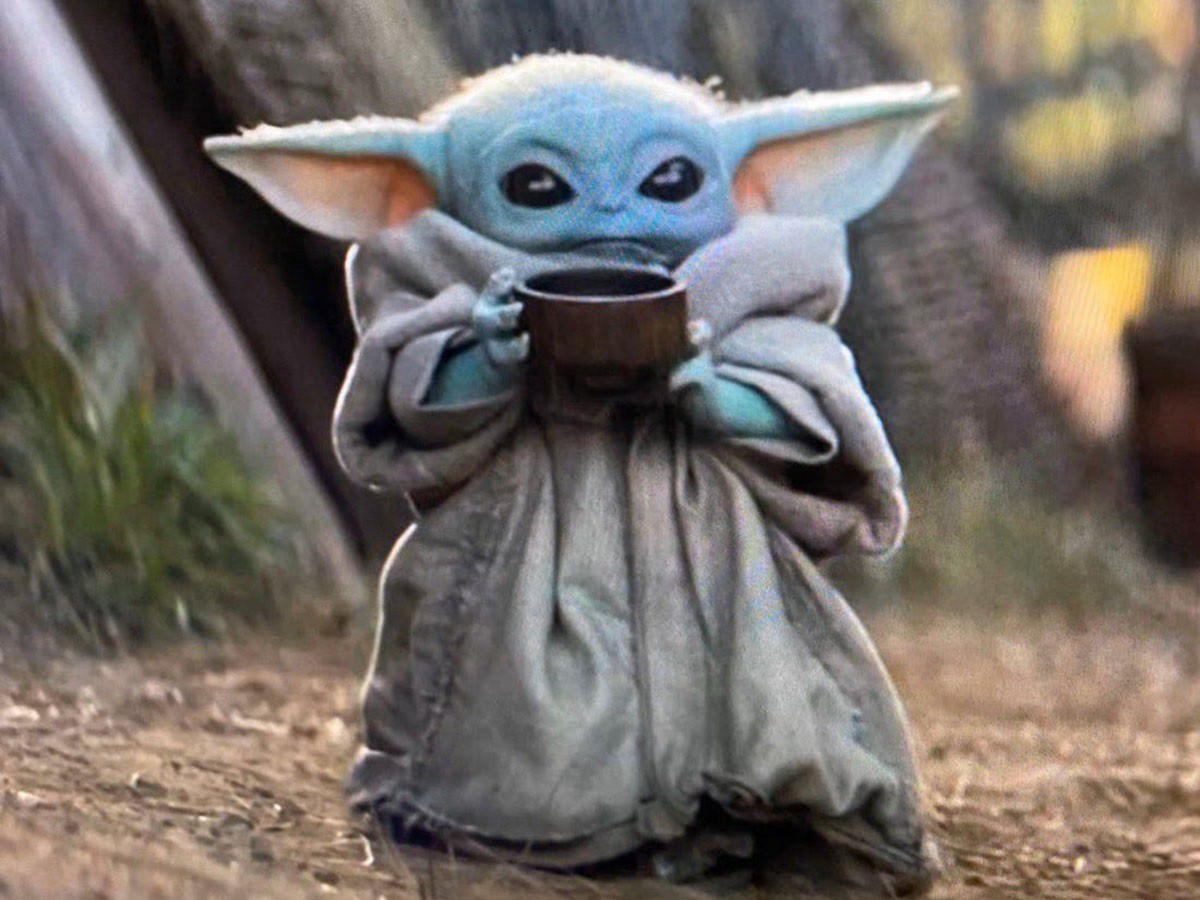

In [2]:
path_to_image = '/Users/shazmeenshaikh/Downloads/yoda.jpeg'
im = Image.open(path_to_image)
im

Finding 8 most common colors from the picture to scale down the original image

finding 8 most common colors.  Note, if "ncolors" is large, this can take a while...
Done finding colors! cluster centres in RGB:
 [[ 93.09991625  88.24645627  83.46465634]
 [194.82945968 165.58154602 137.30420167]
 [ 68.25535224  65.14898538  58.42885724]
 [149.52829155 133.40730409 122.47678462]
 [200.37923706 205.29086024 214.84663843]
 [116.23395218 109.51912437 106.15616373]
 [148.16633247 161.80848896 175.81839564]
 [ 32.11570217  25.18247571  25.30669015]]


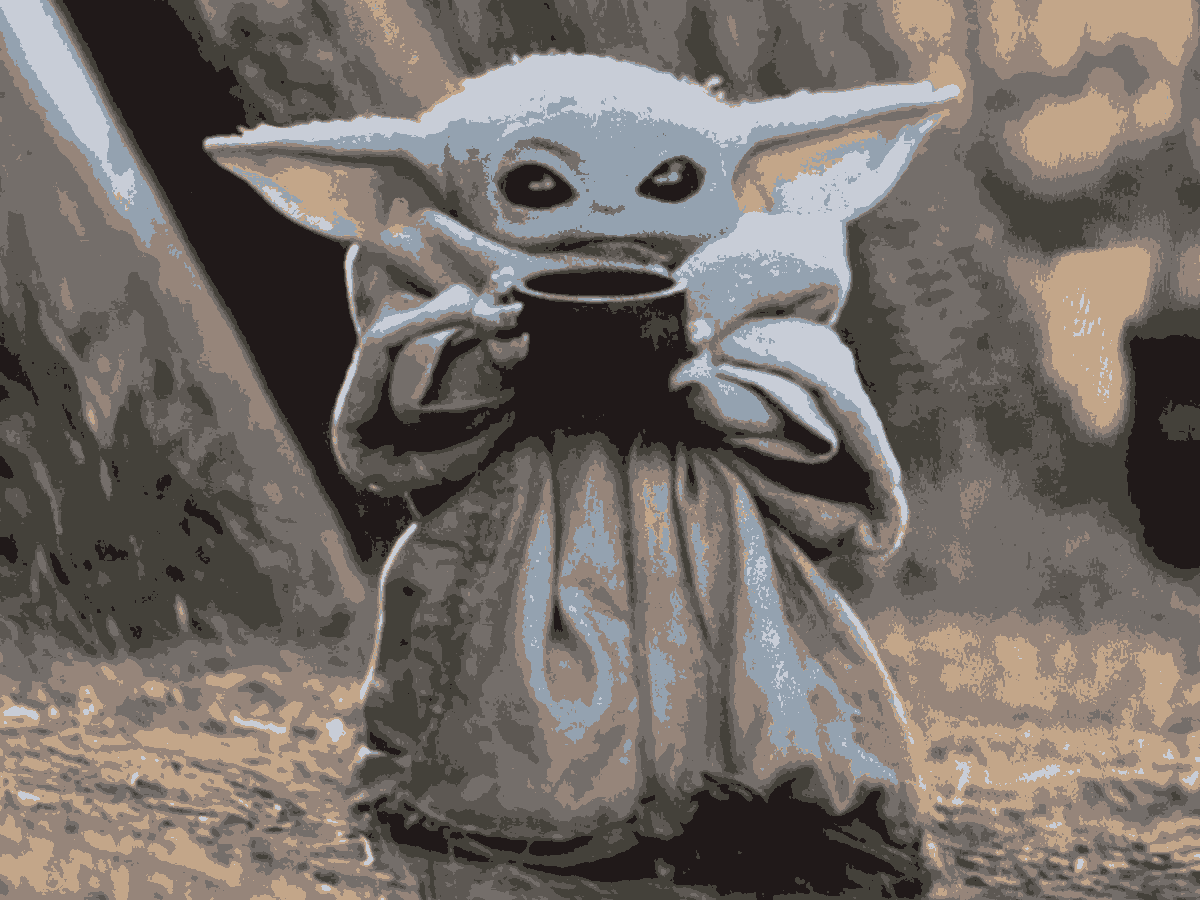

In [3]:
im_data, new_rgbs = convert_image(im, ncolors = 8)
im_data

In [4]:
new_im_data = np.array(im_data)
np.unique(new_im_data.reshape(-1, new_im_data.shape[2]), axis=0)

array([[ 32,  25,  25],
       [ 68,  65,  58],
       [ 93,  88,  83],
       [116, 110, 106],
       [148, 162, 176],
       [150, 133, 122],
       [195, 166, 137],
       [200, 205, 215]], dtype=uint8)

In [5]:
np.unique(new_im_data) #shows the unique array data

array([ 25,  32,  58,  65,  68,  83,  88,  93, 106, 110, 116, 122, 133,
       137, 148, 150, 162, 166, 176, 195, 200, 205, 215], dtype=uint8)

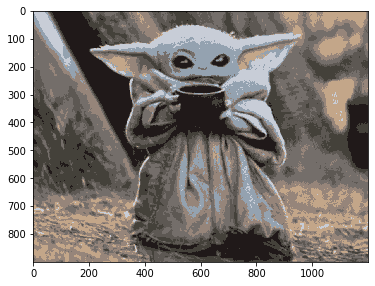

In [6]:
fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(new_im_data)
plt.show() 

In [7]:
myList = [] # start with an empty list
for i in range(3):
    myList.append(i)
myList

[0, 1, 2]

In [8]:
number_of_pixels_of_a_color = [] # num of pixels at a particular color
color_labels = [] # how we label those colors on our histogram
color_values = [] # RGBA sequences
unique_colors = np.unique(new_im_data.reshape(-1, new_im_data.shape[2]), axis=0)
unique_colors

array([[ 32,  25,  25],
       [ 68,  65,  58],
       [ 93,  88,  83],
       [116, 110, 106],
       [148, 162, 176],
       [150, 133, 122],
       [195, 166, 137],
       [200, 205, 215]], dtype=uint8)

In [9]:
for icolor,rgba in enumerate(unique_colors):
    #print(icolor, rgba)
    # we want to count pixels with whatever rgba combination
    # step 1: mask out pixels at a particular color
    reds_mask = new_im_data[:,:,0] == rgba[0] 
    greens_mask = new_im_data[:,:,1] == rgba[1]
    blues_mask = new_im_data[:,:,2] == rgba[2]

    pixel_mask = reds_mask & greens_mask & blues_mask
    
    # step 2: count up all pixels
    npixels = len(new_im_data[pixel_mask])
    
    # store the number of pixels for this rgba combo
    number_of_pixels_of_a_color.append(npixels) # appending to a list obj.
    # also want to name these colors
    color_labels.append("Color #" + str(icolor))
    # last thing: color values
    color_values.append(rgba/255) # this is converting to matplotlib bar

In [10]:
color_labels #shows number of colors 

['Color #0',
 'Color #1',
 'Color #2',
 'Color #3',
 'Color #4',
 'Color #5',
 'Color #6',
 'Color #7']

In [11]:
number_of_pixels_of_a_color #pixel of each color

[135303, 153069, 155233, 225170, 79520, 179123, 94069, 58513]

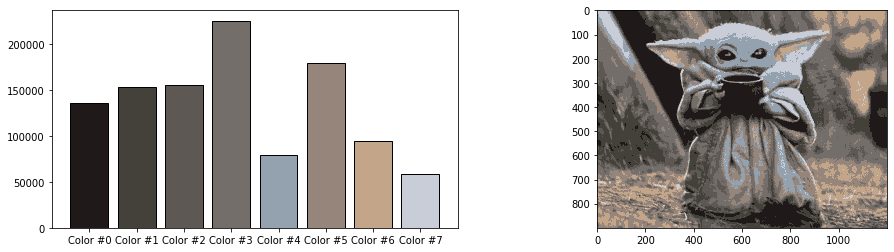

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(16,4))

myBarChart = ax[0].bar(color_labels, number_of_pixels_of_a_color) # now I have a *vector* of axes
ax[1].imshow(new_im_data)

# set colors of each bar individually
for i in range(len(myBarChart)): # for all bars in my barchart
    myBarChart[i].set_color(color_values[i])
    myBarChart[i].set_edgecolor('black')
    
plt.show()

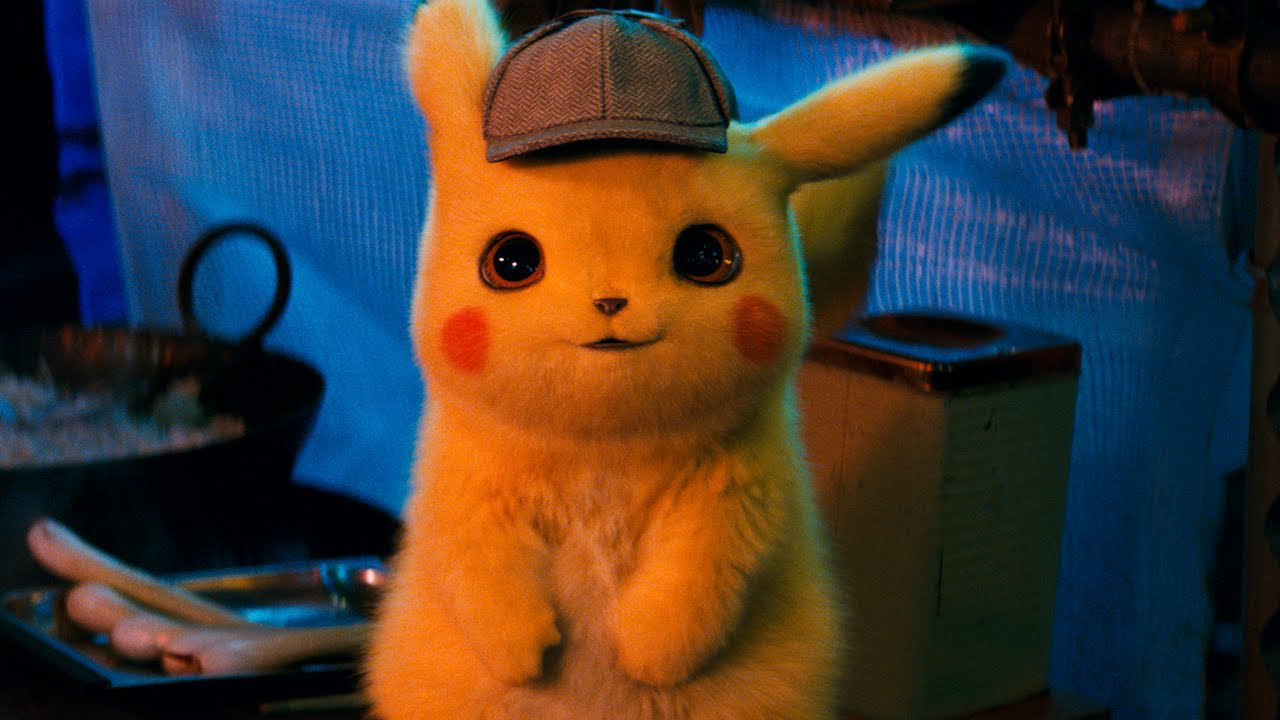

In [13]:
path_to_image = '/Users/shazmeenshaikh/Downloads/pokemon.jpg'
im = Image.open(path_to_image)
im

finding 8 most common colors.  Note, if "ncolors" is large, this can take a while...
Done finding colors! cluster centres in RGB:
 [[ 29.57125809  98.42908615 160.89414177]
 [ 20.75098905  60.83211871 111.3331105 ]
 [224.87569839 114.38792945  28.52616807]
 [  6.17073218  37.52036995  64.48232844]
 [ 33.24302871  30.47906313  16.94079391]
 [158.22462796  82.73400453  25.10556449]
 [ 93.15824353  61.59706149  26.87735933]
 [  4.7740089    6.94192265   9.15277289]]


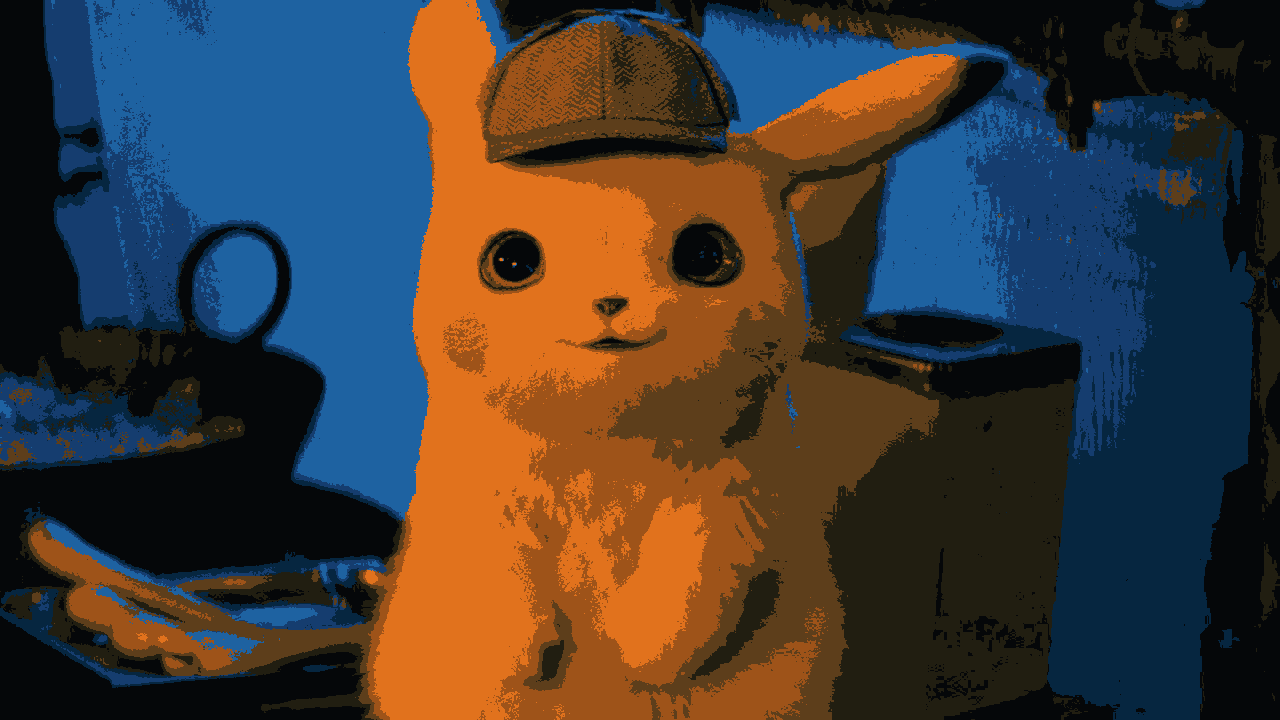

In [14]:
im_data, new_rgbs = convert_image(im, ncolors = 8)
im_data

In [15]:
new_im_data = np.array(im_data)
np.unique(new_im_data.reshape(-1, new_im_data.shape[2]), axis=0)

array([[  5,   7,   9],
       [  6,  38,  64],
       [ 21,  61, 111],
       [ 30,  98, 161],
       [ 33,  30,  17],
       [ 93,  62,  27],
       [158,  83,  25],
       [225, 114,  29]], dtype=uint8)

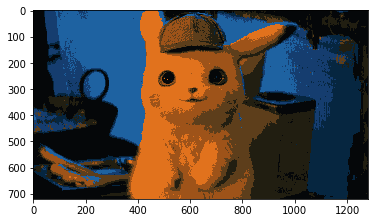

In [16]:
fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(new_im_data)
plt.show() 

In [17]:
myList = [] # start with an empty list
for i in range(3):
    myList.append(i)
myList

number_of_pixels_of_a_color = [] # num of pixels at a particular color
color_labels = [] # how we label those colors on our histogram
color_values = [] # RGBA sequences
unique_colors = np.unique(new_im_data.reshape(-1, new_im_data.shape[2]), axis=0)
unique_colors

array([[  5,   7,   9],
       [  6,  38,  64],
       [ 21,  61, 111],
       [ 30,  98, 161],
       [ 33,  30,  17],
       [ 93,  62,  27],
       [158,  83,  25],
       [225, 114,  29]], dtype=uint8)

In [18]:
for icolor,rgba in enumerate(unique_colors):
    #print(icolor, rgba)
    # we want to count pixels with whatever rgba combination
    # step 1: mask out pixels at a particular color
    reds_mask = new_im_data[:,:,0] == rgba[0] 
    greens_mask = new_im_data[:,:,1] == rgba[1]
    blues_mask = new_im_data[:,:,2] == rgba[2]

    pixel_mask = reds_mask & greens_mask & blues_mask
    
    # step 2: count up all pixels
    npixels = len(new_im_data[pixel_mask])
    
    # store the number of pixels for this rgba combo
    number_of_pixels_of_a_color.append(npixels) # appending to a list obj.
    # also want to name these colors
    color_labels.append("Color #" + str(icolor))
    # last thing: color values
    color_values.append(rgba/255) # this is converting to matplotlib bar

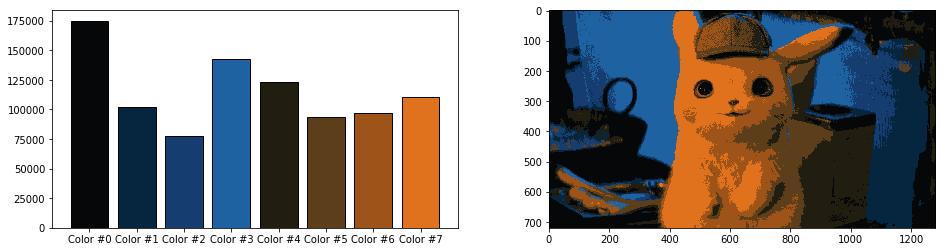

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(16,4))

myBarChart = ax[0].bar(color_labels, number_of_pixels_of_a_color) # now I have a *vector* of axes
ax[1].imshow(new_im_data)

# set colors of each bar individually
for i in range(len(myBarChart)): # for all bars in my barchart
    myBarChart[i].set_color(color_values[i])
    myBarChart[i].set_edgecolor('black')
    
plt.show()

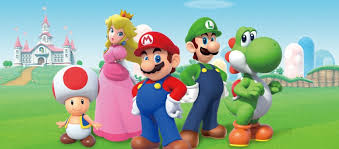

In [20]:
path_to_image = '/Users/shazmeenshaikh/Downloads/mario.jpeg'
im = Image.open(path_to_image)
im

finding 8 most common colors.  Note, if "ncolors" is large, this can take a while...
Done finding colors! cluster centres in RGB:
 [[226.16101172 234.14044828 235.02076907]
 [142.6219469  180.89044248 138.20070796]
 [171.29012514 216.23326986 228.90914037]
 [ 43.19886918  75.39149932 105.47475141]
 [184.404209    74.18021287  61.19932269]
 [115.7968638  181.49695341  71.39722222]
 [228.29603348 154.1253639  158.49235808]
 [130.77612606 205.80214063 230.46231604]]


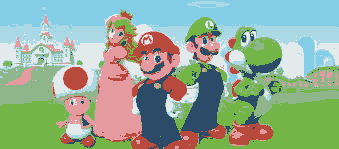

In [21]:
im_data, new_rgbs = convert_image(im, ncolors = 8)
im_data

In [22]:
new_im_data = np.array(im_data)
np.unique(new_im_data.reshape(-1, new_im_data.shape[2]), axis=0)

array([[ 43,  75, 105],
       [116, 181,  71],
       [131, 206, 230],
       [143, 181, 138],
       [171, 216, 229],
       [184,  74,  61],
       [226, 234, 235],
       [228, 154, 158]], dtype=uint8)

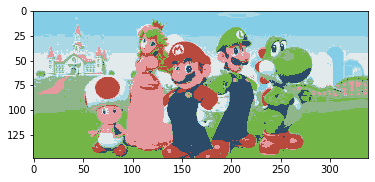

In [23]:
fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(new_im_data)
plt.show() 

In [24]:
myList = [] # start with an empty list
for i in range(3):
    myList.append(i)
myList

number_of_pixels_of_a_color = [] # num of pixels at a particular color
color_labels = [] # how we label those colors on our histogram
color_values = [] # RGBA sequences
unique_colors = np.unique(new_im_data.reshape(-1, new_im_data.shape[2]), axis=0)
unique_colors

array([[ 43,  75, 105],
       [116, 181,  71],
       [131, 206, 230],
       [143, 181, 138],
       [171, 216, 229],
       [184,  74,  61],
       [226, 234, 235],
       [228, 154, 158]], dtype=uint8)

In [25]:
for icolor,rgba in enumerate(unique_colors):
    #print(icolor, rgba)
    # we want to count pixels with whatever rgba combination
    # step 1: mask out pixels at a particular color
    reds_mask = new_im_data[:,:,0] == rgba[0] 
    greens_mask = new_im_data[:,:,1] == rgba[1]
    blues_mask = new_im_data[:,:,2] == rgba[2]

    pixel_mask = reds_mask & greens_mask & blues_mask
    
    # step 2: count up all pixels
    npixels = len(new_im_data[pixel_mask])
    
    # store the number of pixels for this rgba combo
    number_of_pixels_of_a_color.append(npixels) # appending to a list obj.
    # also want to name these colors
    color_labels.append("Color #" + str(icolor))
    # last thing: color values
    color_values.append(rgba/255) # this is converting to matplotlib bar

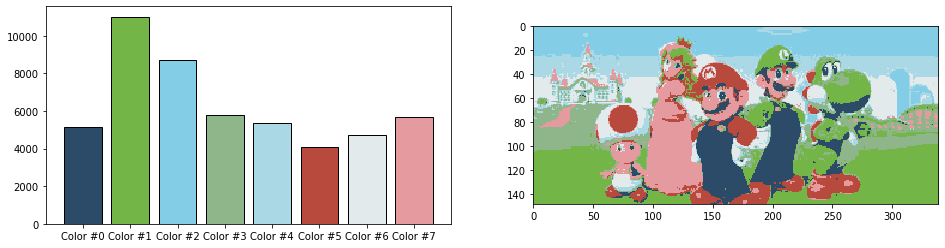

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(16,4))

myBarChart = ax[0].bar(color_labels, number_of_pixels_of_a_color) # now I have a *vector* of axes
ax[1].imshow(new_im_data)

# set colors of each bar individually
for i in range(len(myBarChart)): # for all bars in my barchart
    myBarChart[i].set_color(color_values[i])
    myBarChart[i].set_edgecolor('black')
    
plt.show()

# Notes: Binning and Rebinning

The first Image I chose above is a movie character with greenish-blue skin. The Image had a large amount of brown colour visible to eyes, but after downscaling it, the colours lost their original tint. The blue-green skin colour is no more visible.The eyes perceived brown colour in the image but when we make a histogram, we barely see a proper brown but instead it gives us types of beige and browns that were used although combined now.

For the Second Image, which is also a character lost the red cheek colour, the fur is no more visible. In short, it feels more blurred and pixelated. it lost a lot of background colour.

The Third Image I chose is a little different since it had more than one character. As you can notice, there are a wider variety of colours. Green is the dominant colour as visible to eyes, but as you can see in the histogram, we can quantify the colour values.

Key Takeaways: 
1. Sharpness of color and image is lost
2. Colours are downscales to only 8 which results in losing original colours.
3. Combining of different colour results in loss of information as well.
4. Reconstruction of image is hard
5. Colours can be quantified. It looks way different that what eyes perceives in the first place.


# Both of the color re-mappings presented in this notebook are not perfect.  What are some issues you can think of in how color is rebinned from a full color image into an image with less colors with the functions provided?


The pictures are definetely not perfectly presented. As mentioned above, it has loss of information through colour and sharpness.
You can notice in all the images that, the colours are combined, known as binning. This way, we were able to downsize the images.when you rebin, you cannot construct the exact Image back because of the mixing of colours. The code won't be able to understand what exact combination of colour was binned together.

I also noticed if i used an image that had less number of colors, it gave us an error of having different lengths. This is because we chose to scale down to 8 values, and we require 8 value. Smaller quantity could lead to higher inconsistencies. Picture with colors less than 8 will result in error with the code. On the other hand, by converting the colour samples to 8, we are shadowing the less prominent colour.

Lastly, the algorithm is quite long to process. After converting the images could have been plotted directly with the need to individually masking each colour channel separately.


In [ ]:
Thank you